<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Collecting Job Data Using APIs**


Estimated time needed: **30** minutes


## Objectives


After completing this lab, you will be able to:


*   Collect job data using Jobs API
*   Store the collected data into an excel spreadsheet.


><strong>Note: Before starting with the assignment make sure to read all the instructions and then move ahead with the coding part.</strong>


#### Instructions


To run the actual lab, firstly you need to click on the [Jobs_API](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/Jobs_API.ipynb) notebook link. The file contains flask code which is required to run the Jobs API data.

Now, to run the code in the file that opens up follow the below steps.

Step1: Download the file. 

Step2: Upload the file into your current Jupyter environment using the upload button in your Jupyter interface. Ensure that the file is in the same folder as your working .ipynb file.

Step 2: If working in a local Jupyter environment, use the "Upload" button in your Jupyter interface to upload the Jobs_API notebook into the same folder as your current .ipynb file.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/Upload.PNG">

Step3:  Open the Jobs_API notebook, and run all the cells to start the Flask application. Once the server is running, you can access the API from the URL provided in the notebook.

If you want to learn more about flask, which is optional, you can click on this link [here](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/FLASK_API.md.html).

Once you run the flask code, you can start with your assignment.


## Dataset Used in this Assignment

The dataset used in this lab comes from the following source: https://www.kaggle.com/promptcloud/jobs-on-naukricom under the under a **Public Domain license**.

> Note: We are using a modified subset of that dataset for the lab, so to follow the lab instructions successfully please use the dataset provided with the lab, rather than the dataset from the original source.

The original dataset is a csv. We have converted the csv to json as per the requirement of the lab.


## Warm-Up Exercise


Before you attempt the actual lab, here is a fully solved warmup exercise that will help you to learn how to access an API.


Using an API, let us find out who currently are on the International Space Station (ISS).<br> The API at [http://api.open-notify.org/astros.json](http://api.open-notify.org/astros.json?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ) gives us the information of astronauts currently on ISS in json format.<br>
You can read more about this API at [http://open-notify.org/Open-Notify-API/People-In-Space/](http://open-notify.org/Open-Notify-API/People-In-Space?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)


In [2]:
import requests # you need this module to make an API call
import pandas as pd

In [3]:
api_url = "http://api.open-notify.org/astros.json" # this url gives use the astronaut data

In [4]:
response = requests.get(api_url) # Call the API using the get method and store the
                                # output of the API call in a variable called response.

In [5]:
if response.ok:             # if all is well() no errors, no network timeouts)
    data = response.json()  # store the result in json format in a variable called data
                            # the variable data is of type dictionary.

In [6]:
print(data)   # print the data just to check the output or for debugging

{'people': [{'craft': 'ISS', 'name': 'Oleg Kononenko'}, {'craft': 'ISS', 'name': 'Nikolai Chub'}, {'craft': 'ISS', 'name': 'Tracy Caldwell Dyson'}, {'craft': 'ISS', 'name': 'Matthew Dominick'}, {'craft': 'ISS', 'name': 'Michael Barratt'}, {'craft': 'ISS', 'name': 'Jeanette Epps'}, {'craft': 'ISS', 'name': 'Alexander Grebenkin'}, {'craft': 'ISS', 'name': 'Butch Wilmore'}, {'craft': 'ISS', 'name': 'Sunita Williams'}, {'craft': 'Tiangong', 'name': 'Li Guangsu'}, {'craft': 'Tiangong', 'name': 'Li Cong'}, {'craft': 'Tiangong', 'name': 'Ye Guangfu'}], 'number': 12, 'message': 'success'}


Print the number of astronauts currently on ISS.


In [7]:
print(data.get('number'))

12


Print the names of the astronauts currently on ISS.


In [8]:
astronauts = data.get('people')
print("There are {} astronauts on ISS".format(len(astronauts)))
print("And their names are :")
for astronaut in astronauts:
    print(astronaut.get('name'))

There are 12 astronauts on ISS
And their names are :
Oleg Kononenko
Nikolai Chub
Tracy Caldwell Dyson
Matthew Dominick
Michael Barratt
Jeanette Epps
Alexander Grebenkin
Butch Wilmore
Sunita Williams
Li Guangsu
Li Cong
Ye Guangfu


Hope the warmup was helpful. Good luck with your next lab!


## Lab: Collect Jobs Data using Jobs API


### Objective: Determine the number of jobs currently open for various technologies  and for various locations


Collect the number of job postings for the following locations using the API:

* Los Angeles
* New York
* San Francisco
* Washington DC
* Seattle
* Austin
* Detroit


In [9]:
#Import required libraries
import pandas as pd
import json
import requests
import re

https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/jobs.json#### Write a function to get the number of jobs for the Python technology.<br>
> Note: While using the lab you need to pass the **payload** information for the **params** attribute in the form of **key** **value** pairs.
  Refer the ungraded **rest api lab** in the course **Python for Data Science, AI & Development**  <a href="https://www.coursera.org/learn/python-for-applied-data-science-ai/ungradedLti/P6sW8/hands-on-lab-access-rest-apis-request-http?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01">link</a>
  
 ##### The keys in the json are 
 * Job Title
 
 * Job Experience Required
 
 * Key Skills
 
 * Role Category
 
 * Location
 
 * Functional Area
 
 * Industry
 
 * Role 
 
You can also view  the json file contents  from the following <a href = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/jobs.json">json</a> URL.



In [10]:
api_url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/jobs.json"

def get_number_of_jobs_T(technology):
    # Fetch data from the API
    response = requests.get(api_url)
    data = response.json()

    # Define the pattern dictionary
    pattern_dict = {
        'C': '(C)',
        'C++': '(C\+\+)',
        'Java': '(Java)',
        'C#': '(C\#)',
        'Python': '(Python)',
        'Scala': '(Scala)',
        'Oracle': '(Oracle)',
        'SQL Server': '(SQL Server)',
        'MySQL Server': '(MySQL Server)',
        'PostgreSQL': '(PostgreSQL)',
        'MongoDB': '(MongoDB)',
        'JavaScript': '(JavaScript)'
    }

    # Count the number of jobs for the given technology
    number_of_jobs = 0
    for rec in data:
        if 'Key Skills' in rec and re.search(pattern_dict[technology], rec['Key Skills']):
            number_of_jobs += 1

    return technology, number_of_jobs

Calling the function for Python and checking if it works.


In [11]:
get_number_of_jobs_T("Python")

('Python', 1173)

#### Write a function to find number of jobs in US for a location of your choice


In [11]:
 def get_number_of_jobs_L(location):
    #your coe goes here
    response = requests.get(api_url)
    data = response.json()
    
    pattern_dict = {
        'Los Angeles': '(Los Angeles)',
        'New York': '(New York)',
        'San Francisco': '(San Francisco)',
        'Washington DC': '(Washington DC)',
        'Seattle': '(Seattle)',
        'Austin': '(Austin)',
        'Detroit': '(Detroit)'
    }

    number_of_jobs = 0
    for rec in data:
        if 'Location' in rec and re.search(pattern_dict[location], rec['Location']):
            number_of_jobs += 1

    return location, number_of_jobs

Call the function for Los Angeles and check if it is working.


In [12]:
#your code goes here
get_number_of_jobs_L("Los Angeles")

('Los Angeles', 640)

In [13]:
## additional / extra work 

# rank of job counts by proggramming language

In [14]:
import json
import re

# Load the JSON data from the file
with open('jobs.json', 'r') as file:
    data = json.load(file)

# Define the pattern dictionary
pattern_dict = {
    'C': '(C)',
    'C++': '(C\+\+)',
    'Java': '(Java)',
    'C#': '(C\#)',
    'Python': '(Python)',
    'Scala': '(Scala)',
    'Oracle': '(Oracle)',
    'SQL Server': '(SQL Server)',
    'MySQL Server': '(MySQL Server)',
    'PostgreSQL': '(PostgreSQL)',
    'MongoDB': '(MongoDB)',
    'JavaScript': '(JavaScript)'
}

# Count the number of jobs for each technology
job_counts = {}
for tech, pattern in pattern_dict.items():
    count = 0
    for rec in data:
        if 'Key Skills' in rec and re.search(pattern, rec['Key Skills']):
            count += 1
    job_counts[tech] = count

job_counts

{'C': 13498,
 'C++': 305,
 'Java': 2609,
 'C#': 333,
 'Python': 1173,
 'Scala': 33,
 'Oracle': 784,
 'SQL Server': 250,
 'MySQL Server': 0,
 'PostgreSQL': 10,
 'MongoDB': 174,
 'JavaScript': 355}

In [15]:
# Sort the job counts in descending order
sorted_job_counts = sorted(job_counts.items(), key=lambda x: x[1], reverse=True)
sorted_job_counts

[('C', 13498),
 ('Java', 2609),
 ('Python', 1173),
 ('Oracle', 784),
 ('JavaScript', 355),
 ('C#', 333),
 ('C++', 305),
 ('SQL Server', 250),
 ('MongoDB', 174),
 ('Scala', 33),
 ('PostgreSQL', 10),
 ('MySQL Server', 0)]

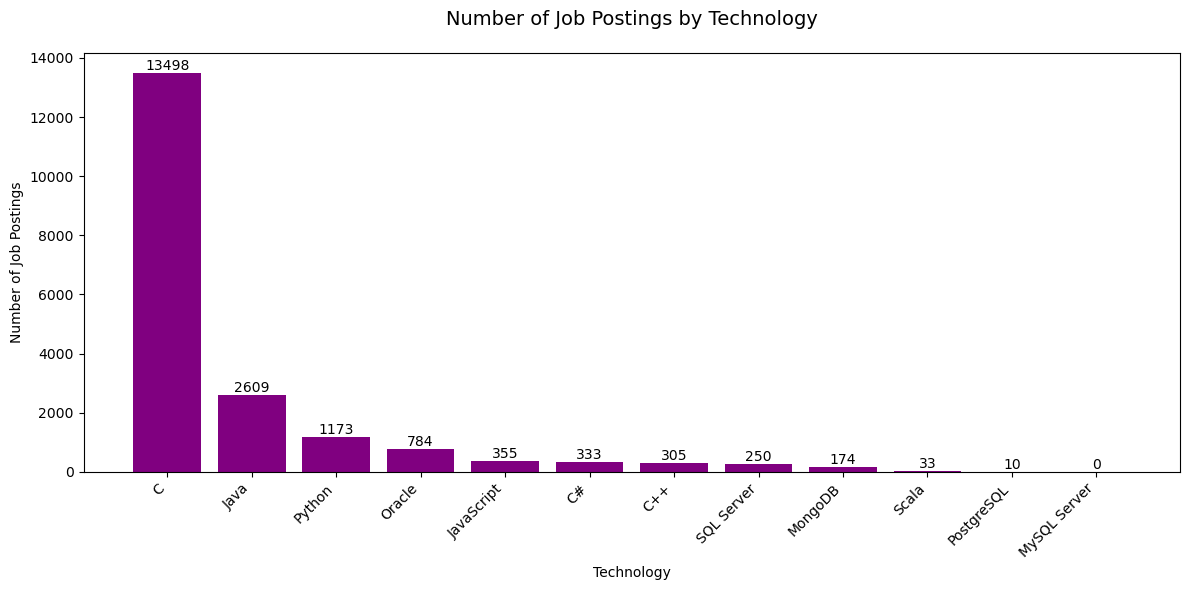

In [17]:
# additional 

import matplotlib.pyplot as plt
import pandas as pd

# Data
technologies = ['C', 'Java', 'Python', 'Oracle', 'JavaScript', 'C#', 'C++', 
                'SQL Server', 'MongoDB', 'Scala', 'PostgreSQL', 'MySQL Server']
job_postings = [13498, 2609, 1173, 784, 355, 333, 305, 250, 174, 33, 10, 0]

# Create figure and axis
plt.figure(figsize=(12, 6))

# Create bar chart
plt.bar(technologies, job_postings, color='purple')

# Customize the chart
plt.title('Number of Job Postings by Technology', fontsize=14, pad=20)
plt.xlabel('Technology')
plt.ylabel('Number of Job Postings')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for i, v in enumerate(job_postings):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

In [16]:
# job counts by location

import json
from collections import Counter
import re

# Load the JSON data
with open('jobs.json', 'r') as file:
    data = json.load(file)

# Define the pattern dictionary
pattern_dict = {
    'Los Angeles': '(Los Angeles)',
    'New York': '(New York)',
    'San Francisco': '(San Francisco)',
    'Washington DC': '(Washington DC)',
    'Seattle': '(Seattle)',
    'Austin': '(Austin)',
    'Detroit': '(Detroit)'
}

# Count the number of jobs for each location
location_counts = Counter()
for rec in data:
    if 'Location' in rec:
        for location, pattern in pattern_dict.items():
            if re.search(pattern, rec['Location']):
                location_counts[location] += 1

location_counts

Counter({'Los Angeles': 640,
         'New York': 3226,
         'San Francisco': 435,
         'Washington DC': 5316,
         'Seattle': 3375,
         'Detroit': 3945,
         'Austin': 434})

In [18]:
# Rank the locations based on the number of job postings in descending order
ranked_locations = location_counts.most_common()
ranked_locations

[('Washington DC', 5316),
 ('Detroit', 3945),
 ('Seattle', 3375),
 ('New York', 3226),
 ('Los Angeles', 640),
 ('San Francisco', 435),
 ('Austin', 434)]

### Store the results in an excel file


Call the API for all the given technologies above and write the results in an excel spreadsheet.


If you do not know how create excel file using python, double click here for **hints**.

<!--

from openpyxl import Workbook        # import Workbook class from module openpyxl
wb=Workbook()                        # create a workbook object
ws=wb.active                         # use the active worksheet
ws.append(['Country','Continent'])   # add a row with two columns 'Country' and 'Continent'
ws.append(['Eygpt','Africa'])        # add a row with two columns 'Egypt' and 'Africa'
ws.append(['India','Asia'])          # add another row
ws.append(['France','Europe'])       # add another row
wb.save("countries.xlsx")            # save the workbook into a file called countries.xlsx


-->


Create a python list of all technologies for which you need to find the number of jobs postings.


In [19]:
#your code goes here
technologies = ['C', 'C++', 'Java', 'C#', 'Python', 'Scala', 'Oracle', 'SQL Server', 'MySQL Server', 'PostgreSQL', 'MongoDB', 'JavaScript']


Import libraries required to create excel spreadsheet


In [20]:
# your code goes here
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.3/251.3 kB 17.2 MB/s eta 0:00:00


In [30]:
import pandas as pd
import json
import re
import requests
import openpyxl
from openpyxl import Workbook 

Create a workbook and select the active worksheet


In [31]:
# your code goes here

wb=Workbook()                        # create a workbook object
ws=wb.active                         # use the active worksheet

Find the number of jobs postings for each of the technology in the above list.
Write the technology name and the number of jobs postings into the excel spreadsheet.


In [32]:
#your code goes here

# Fetch data from the API
response = requests.get(api_url)
data = response.json()

# List of technologies to search for
technologies = ['C', 'C++', 'Java', 'C#', 'Python', 'Scala', 'Oracle', 'SQL Server', 'MySQL Server', 'PostgreSQL', 'MongoDB', 'JavaScript']

# Define the pattern dictionary for technologies
pattern_dict = {
    'C': '(C)',
    'C++': '(C\+\+)',
    'Java': '(Java)',
    'C#': '(C\#)',
    'Python': '(Python)',
    'Scala': '(Scala)',
    'Oracle': '(Oracle)',
    'SQL Server': '(SQL Server)',
    'MySQL Server': '(MySQL Server)',
    'PostgreSQL': '(PostgreSQL)',
    'MongoDB': '(MongoDB)',
    'JavaScript': '(JavaScript)'
}

# Count the number of jobs for each technology
job_counts = []
for tech in technologies:
    number_of_jobs = 0
    for rec in data:
        if 'Key Skills' in rec and re.search(pattern_dict[tech], rec['Key Skills']):
            number_of_jobs += 1
    job_counts.append((tech, number_of_jobs))

# Sort the results by the number of jobs in descending order
job_counts_sorted = sorted(job_counts, key=lambda x: x[1], reverse=True)

# Create a workbook and use the active worksheet
wb = Workbook()
ws = wb.active
ws.title = "Job Counts"

# Write the header
ws.append(["Technology", "Number of Job Postings"])

# Write the job counts
for tech, count in job_counts_sorted:
    ws.append([tech, count])

# Save the workbook
wb.save("job_postings-1.xlsx")

Save into an excel spreadsheet named **job-postings.xlsx**.


In [34]:
#your code goes here

print("Job postings data has been written to job_postings-1.xlsx")

Job postings data has been written to job_postings-1.xlsx


#### In the similar way, you can try for below given technologies and results  can be stored in an excel sheet.


Collect the number of job postings for the following languages using the API:

*   C
*   C#
*   C++
*   Java
*   JavaScript
*   Python
*   Scala
*   Oracle
*   SQL Server
*   MySQL Server
*   PostgreSQL
*   MongoDB


In [35]:
# your code goes here
# it's done already above

## Authors


Ayushi Jain


### Other Contributors


Rav Ahuja

Lakshmi Holla

Malika


Copyright © IBM Corporation.


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- | 
| 2022-01-19        | 0.3     | Lakshmi Holla        | Added changes in the markdown      |
| 2021-06-25        | 0.2     | Malika            | Updated GitHub job json link       |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
